In [1]:
%matplotlib notebook
import seaborn
import matplotlib.pyplot as plt
import numpy as np

Display beta function for various valus of `a` and `b`. Think of `a` as the number of heads, `b` as the number of tails.

<IPython.core.display.Javascript object>


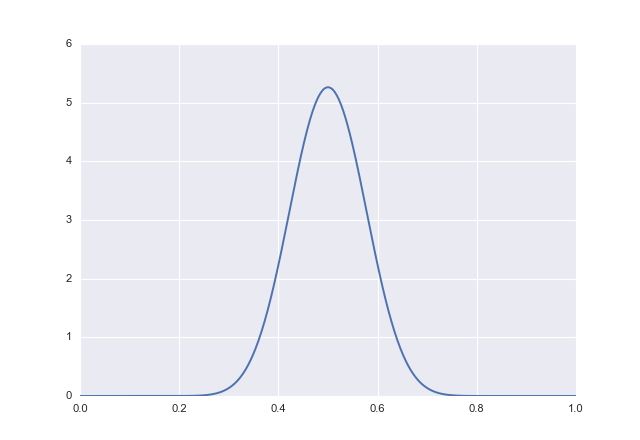

In [3]:
from scipy.stats import beta
from ipywidgets import interact, IntSlider


xs = np.linspace(0, 1, 501)
def plt_beta(a=1, b=1):
    plt.figure()
    plt.plot(xs, beta.pdf(xs, a, b));
    

interact(plt_beta, 
         a=IntSlider(min=1, max=50, value=3, continuous_update=False), 
         b=IntSlider(min=1, max=50, value=10, continuous_update=False));      

Now lets use Beta function to establish the prior for our coin, and then flip the coin N times.

In [4]:
from numpy.random import binomial, seed
%precision 4

def draw_coin_dist(a=1, b=1, bias=0.5, flips=50, update_prior=True):
    """ With this one we simulate multiple flips of a single coin
    with a given bias. We flip `flips` times, and compute the 
    posterior. We start with a triangular prior. 
    
    """
    
    global prior, post, lh
    
    seed(1)
    N = 101
    theta = np.linspace(0, 1.0, N)

    prior = beta.pdf(theta, a, b)
    prior /= sum(prior)

    def likelihood(theta, heads, tails):
        return theta**heads * (1-theta)**tails

    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.title('prior')
    plt.plot(theta, prior)

    ys = binomial(1, bias, flips)
    results = ['H' if y == 1 else 'T' for y in ys]
    print(''.join(results))
    
    with seaborn.color_palette(n_colors=1):
        for i in range(flips):
            heads = sum(ys[:i+1])
            tails = (i+1)-heads
            lh = np.array([likelihood(th, heads, tails) for th in theta])

            post = np.array([pr * l for pr, l in zip(prior, lh)])
            post /= sum(post)
            if update_prior:
                prior[:] = post
            plt.subplot(133)
            plt.title('posterior')
            plt.plot(theta, post, alpha=max(.2, i/flips))
        
            plt.subplot(132)
            plt.title('likelihood')
            plt.plot(theta, lh,  alpha=max(.2, i/flips));
        print('est. bias (mean): {:.4f}'.format(np.dot(theta, post)))
        print('mode: {:.4f}'.format(theta[np.argmax(post)]))
        print('heads/flips', sum(ys) / len(ys))

<IPython.core.display.Javascript object>


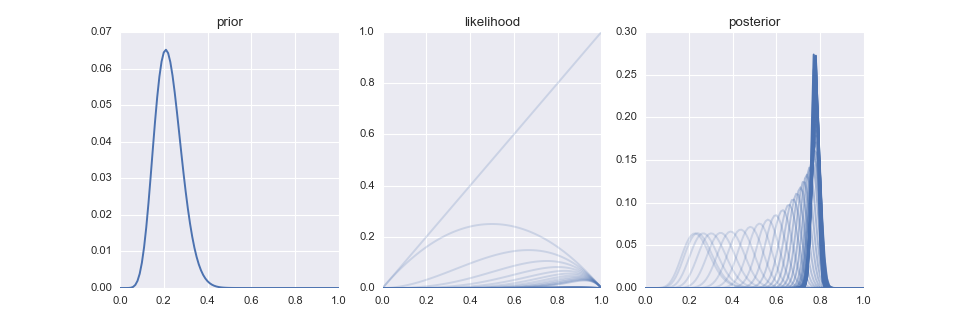

HTHHHHHHHHHHHTHHHHHHTTHHTTHHHTHHTHHHHTHTT
est. bias (mean): 0.7737
mode: 0.7700
heads/flips 0.731707317073


In [5]:
from ipywidgets import FloatSlider

interact(draw_coin_dist, 
         a=IntSlider(min=1, max=50, value=10, continuous_update=False), 
         b=IntSlider(min=1, max=50, value=10, continuous_update=False),    
         bias=FloatSlider(min=.1, max=.9, value=.5, continuous_update=False),
         flips=IntSlider(min=1, max=500, value=50, continuous_update=False),
         update_prior=True);    